In [1]:
import os
import json
import pandas as pd
import numpy as np
import json
import logging ### to monitor the code
from bs4 import BeautifulSoup
import xml.etree.cElementTree as ET
import pickle
import math
import random
import sys
import csv
import unicodedata
import requests
from urllib.request import urlopen 
import io
import getpass
import re
from collections import defaultdict
from itertools import islice #¬†to iterate through dicts

import nltk
from nltk.collocations import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.oauth2 import service_account # based on google-auth library

import sddk

In [2]:
#from anda import gr
# OR uncomment the following:
script_url = "https://raw.githubusercontent.com/sdam-au/anda_py/master/anda/gr.py"
exec(requests.get(script_url).content)

In [152]:
command = "n = (1 + 2)* 5"
exec(command)

In [153]:
n

15

In [3]:
conf = sddk.configure("SDAM_root", "648597@au.dk")

sciencedata.dk username (format '123456@au.dk'): 648597@au.dk
sciencedata.dk password: ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


In [4]:
# to access gsheet, you need Google Service Account key json file
# I have mine located in my personal space on sciencedata.dk, so I read it from there:

# (1) read the file and parse its content
file_data = conf[0].get("https://sciencedata.dk/files/ServiceAccountsKey.json").json()
# (2) transform the content into crendentials object
credentials = service_account.Credentials.from_service_account_info(file_data)
#¬†(3) specify your usage of the credentials
scoped_credentials = credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive'])
#¬†(4) use the constrained credentials for authentication of gspread package
gc = gspread.Client(auth=scoped_credentials)

ECCE_AGT_overview = gc.open_by_url("https://docs.google.com/spreadsheets/d/1KPpPaeX215HR_fVrakvJp8aB6oZDhHFTcBw0MKLw6as/edit?usp=sharing")

#¬†Import the data

In [5]:
AGT = sddk.read_file("SDAM_data/AGT/AGT_20201020.json", "df", conf)
AGT.head(5)

filename              author  \
0  tlg0001.tlg001.perseus-grc2.xml  Apollonius Rhodius   
1  tlg0003.tlg001.perseus-grc2.xml          Thucydides   
2  tlg0004.tlg001.perseus-grc1.xml   Diogenes Laertius   
3  tlg0005.tlg001.perseus-grc1.xml          Theocritus   
4  tlg0005.tlg002.perseus-grc1.xml          Theocritus   

                                               title  \
0                           Argonautica; Argonautica   
1    The Peloponnesian War; Historiae in two volumes   
2  Lives of Eminent Philosophers; Lives of Eminen...   
3                                    Idylls ; Idylls   
4                                  Epigrams ; Idylls   

                                              string author_id  \
0  ·ºÄœÅœáœåŒºŒµŒΩŒøœÇ œÉŒ≠Œø, Œ¶Œø·øñŒ≤Œµ, œÄŒ±ŒªŒ±ŒπŒ≥ŒµŒΩŒ≠œâŒΩ Œ∫ŒªŒ≠Œ± œÜœâœÑ·ø∂ŒΩ Œº...   tlg0001   
1  ŒòŒøœÖŒ∫œÖŒ¥ŒØŒ¥Œ∑œÇ ·ºàŒ∏Œ∑ŒΩŒ±·øñŒøœÇ ŒæœÖŒΩŒ≠Œ≥œÅŒ±œàŒµ œÑ·Ω∏ŒΩ œÄœåŒªŒµŒºŒøŒΩ œÑ·ø∂ŒΩ ...   tlg0003   
2  ŒíŒôŒ©Œù ŒöŒëŒô ŒìŒùŒ©ŒúŒ©Œù Œ§Œ©Œù ŒïŒù Œ¶ŒôŒõŒüŒ£ŒüŒ¶ŒôŒëŒô ŒïŒ•ŒîŒüŒöŒôŒúŒóŒ£ŒëŒùŒ§...   tlg0004   
3  ŒòœçœÅœÉŒπœÇ ·º¢ ·æ†Œ¥ŒÆ ŒòœçœÅœÉŒπœÇ ÃîŒëŒ¥œç œÑŒπ œÑ·Ω∏ œàŒπŒ∏œçœÅŒπœÉŒºŒ± Œ∫Œ±·Ω∂ ·ºÅ...   tlg0005   
4  Œ± œÄŒ±Œª œùŒπ.336 œÑ·Ω∞ ·ø•œåŒ¥Œ± œÑ·Ω∞ Œ¥œÅŒøœÉœåŒµŒΩœÑŒ± Œ∫Œ±·Ω∂ ·ºÅ Œ∫Œ±œÑŒ¨œÄœÖ...   tlg0005   

           doc_id  raw_date  date_avr                  date_probs  \
0  tlg0001.tlg001    3 B.C.      -2.5                 {'-2.5': 1}   
1  tlg0003.tlg001    5 B.C.      -4.5                 {'-4.5': 1}   
2  tlg0004.tlg001    A.D. 3       2.5                  {'2.5': 1}   
3  tlg0005.tlg001  4-3 B.C.      -3.0  {'-3.5': 0.5, '-2.5': 0.5}   
4  tlg0005.tlg002  4-3 B.C.      -3.0  {'-3.5': 0.5, '-2.5': 0.5}   

   date_manual provenience  wordcount  \
0         -2.5       pagan      38822   
1         -4.5       pagan     150160   
2          NaN                 111053   
3          NaN                  19514   
4          NaN                   1807   

                                             lemmata  lemmata_wordcount  \
0  [œÉŒ≠Œø, œÜŒø·øñŒ≤ŒøœÇ, œÄŒ±ŒªŒ±ŒπŒ≥ŒµŒΩŒÆœÇ, Œ∫ŒªŒ≠ŒøœÇ, œÜŒ¨ŒøœÇ, ŒºŒπŒºŒΩŒÆœÉŒ∫...              24237   
1  [Œ∏ŒøœÖŒ∫œÖŒ¥ŒØŒ¥Œ∑œÇ, ·ºàŒ∏Œ∑ŒΩŒ±·øñŒøœÇ, œÉœÖŒ≥Œ≥œÅŒ¨œÜœâ, œÄœåŒªŒµŒºŒøœÇ, Œ†ŒµŒªŒø...              68166   
2  [Œ≤ŒØŒ±, ·ºÄŒ∫ŒÆ, Œ≥ŒΩœéŒºŒ∑, ·ºïŒΩŒøœÇ, œÜŒπŒªŒøœÉŒøœÜŒØŒ±, Œµ·ΩêŒ¥ŒøŒ∫ŒπŒºŒ≠œâ, ...              55580   
3  [Œ∏œçœÅœÉŒπœÇ, ·ºÄŒøŒπŒ¥ŒÆ, Œ∏œçœÅœÉŒπœÇ, Œ±Œ¥œç, œàŒπŒ∏œçœÅŒπœÉŒºŒ±, œÄŒØœÑœÖœÇ,...              12478   
4  [œÄŒ±Œª, œùŒπ, ·ø•ŒøŒ¥·øÜ, Œ¥œÅŒøœÉœåŒµŒΩœÑŒ±, Œ∫Œ±œÑŒ¨œÄœÖŒ∫ŒΩŒøœÇ, ·ºêŒ∫Œµ·øñŒΩŒøœÇ...               1137   

                                lemmatized_sentences  
0  [[œÉŒ≠Œø, œÜŒø·øñŒ≤ŒøœÇ, œÄŒ±ŒªŒ±ŒπŒ≥ŒµŒΩŒÆœÇ, Œ∫ŒªŒ≠ŒøœÇ, œÜŒ¨ŒøœÇ, ŒºŒπŒºŒΩŒÆœÉ...  
1  [[Œ∏ŒøœÖŒ∫œÖŒ¥ŒØŒ¥Œ∑œÇ, ·ºàŒ∏Œ∑ŒΩŒ±·øñŒøœÇ, œÉœÖŒ≥Œ≥œÅŒ¨œÜœâ, œÄœåŒªŒµŒºŒøœÇ, Œ†ŒµŒª...  
2  [[Œ≤ŒØŒ±, ·ºÄŒ∫ŒÆ, Œ≥ŒΩœéŒºŒ∑, ·ºïŒΩŒøœÇ, œÜŒπŒªŒøœÉŒøœÜŒØŒ±, Œµ·ΩêŒ¥ŒøŒ∫ŒπŒºŒ≠œâ,...  
3  [[Œ∏œçœÅœÉŒπœÇ, ·ºÄŒøŒπŒ¥ŒÆ, Œ∏œçœÅœÉŒπœÇ, Œ±Œ¥œç, œàŒπŒ∏œçœÅŒπœÉŒºŒ±, œÄŒØœÑœÖœÇ...  
4  [[œÄŒ±Œª, œùŒπ], [·ø•ŒøŒ¥·øÜ, Œ¥œÅŒøœÉœåŒµŒΩœÑŒ±, Œ∫Œ±œÑŒ¨œÄœÖŒ∫ŒΩŒøœÇ, ·ºêŒ∫Œµ·øñ...

In [22]:
len(AGT)

1403

In [23]:
AGT["wordcount"].sum()

34587206

In [25]:
len(AGT[AGT["date_avr"]< 4])

1219

In [27]:
AGT[AGT["date_avr"]< 4]["wordcount"].sum()

22719774

# Œ¥ŒπŒ∫* over the whole corpus

In [6]:
# whole corpus as a list of lemmata
AGT_lemmata_list = np.concatenate(AGT["lemmata"].tolist())
len(AGT_lemmata_list)

14114036

In [7]:
match_pattern = "(Œ∫Œ±œÑŒ±|·ΩëœÄœå|·ºêŒ∫|·ºÄ|·ºÑ|·ºÄŒΩœÑŒØ|^)Œ¥[Œπ|ŒØ]Œ∫(Œ±|Œ¨|Œø|œå|ŒØ|Œ≠|Œ∑)(.+)?"

dik_words = [word for word in AGT_lemmata_list if re.search(match_pattern, word)]
dik_words_df = pd.DataFrame(nltk.FreqDist(dik_words).most_common(), columns=["lemma", "count"])
dik_words_df.head(5)

lemma  count
0     Œ¥ŒØŒ∫Œ±ŒπŒøœÇ  14828
1        Œ¥ŒØŒ∫Œ∑   6621
2  Œ¥ŒπŒ∫Œ±ŒπŒøœÉœçŒΩŒ∑   4434
3      ·ºÄŒ¥ŒπŒ∫Œ≠œâ   4127
4      ·ºÑŒ¥ŒπŒ∫ŒøœÇ   4000

In [8]:
dik_words_df["translation"] = dik_words_df["lemma"].apply(lemma_translator)
dik_words_df.head(12)

lemma  count                                        translation
0       Œ¥ŒØŒ∫Œ±ŒπŒøœÇ  14828  observant of custom and social rule, well-orde...
1          Œ¥ŒØŒ∫Œ∑   6621                                      custom, usage
2    Œ¥ŒπŒ∫Œ±ŒπŒøœÉœçŒΩŒ∑   4434                             righteousness, justice
3        ·ºÄŒ¥ŒπŒ∫Œ≠œâ   4127                                        to do wrong
4        ·ºÑŒ¥ŒπŒ∫ŒøœÇ   4000                   wrong-doing, unrighteous, unjust
5      Œ¥ŒπŒ∫Œ±œÉœÑŒÆœÇ   2450                                            a judge
6        ·ºÄŒ¥ŒπŒ∫ŒØŒ±   2105                             wrong-doing, injustice
7   Œ¥ŒπŒ∫Œ±œÉœÑŒÆœÅŒπŒøŒΩ   1339                                 a court of justice
8       ·ºÄŒ¥ŒØŒ∫Œ∑ŒºŒ±    994                              a wrong done, a wrong
9        Œ¥ŒπŒ∫Œ¨Œ∂œâ    932                      to judge, to give judgment on
10      Œ¥ŒπŒ∫Œ±Œπœåœâ    544                                       to set right
11     Œ¥ŒπŒ∫Œ±ŒØœâŒºŒ±    330                 an act by which wrong is set right

In [9]:
# set_with_dataframe(ECCE_AGT_overview.add_worksheet("dik_words", 1,1), dik_words_df)

#¬†Chronological overview

In [10]:
words = ["Œ¥ŒØŒ∫Œ±ŒπŒøœÇ", "Œ¥ŒØŒ∫Œ∑", "Œ¥ŒπŒ∫Œ±ŒπŒøœÉœçŒΩŒ∑"]

In [11]:
def count_words_in_df_column(docs, words, wordcount=None):
    '''
    Parameters
    ----------
    docs : `pandas.Series` consisting of lists
        List or series of lists, each list representing a tokenized (and lemmatized) version of a document
    words : `list`
        List of words to be counted
    
    Returns
    -------
    `dict`
        Dictionary of word : count pairs
    '''
    counts_dict = {}
    weighted_sum = 0
    for word in words:
        count = docs.apply(lambda doc_list: doc_list.count(word)).sum()
        counts_dict[word] = count
        if wordcount != None:
            if wordcount > 0:
                weighted = np.round(count / wordcount, 5)
                counts_dict[word + "_weighted"] = weighted
                weighted_sum += weighted
    counts_dict["weighted_sum"] = weighted_sum
    return counts_dict

In [12]:
dates_list = [date / 100 for date in range(-750, 400, 50)]
print(dates_list)

[-7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]


In [13]:
def date_avr_to_string(date):
    if str(date)[-1]=="5":
        date_number = str(int(abs(date) + 0.5))
       
    else: 
        if date < 0:
            date_number = str(int(abs(date) + 1))  + "/" + str(int(abs(date)))
        else: 
            date_number = str(int(abs(date)))  + "/" + str(int(abs(date) + 1))
    if date < 0: date_string = date_number + " BCE"
    else: date_string = date_number + " CE"
    if date == 0.0:
        date_string = "1 BCE/1 CE"
    return date_string

In [14]:
date_avr_to_string(0.0)

'1 BCE/1 CE'

In [15]:
date_avr_to_string(0.5)

'1 CE'

In [87]:
subselections = []
for date in dates_list:
    subselection = AGT[AGT["date_avr"]== date]
    wordcount_christian = AGT[(AGT["date_avr"]== date) & (AGT["provenience"]=="christian")]["wordcount"].sum()
    wordcount_pagan = AGT[(AGT["date_avr"]== date) & (AGT["provenience"]!="christian")]["wordcount"].sum()
    wordcount = subselection["wordcount"].sum()
    doccount = len(subselection)
    date_string = date_avr_to_string(date)
    subselection_dict = {"date_string" : date_string, "column" : "date_avr", "value" : date, "wordcount" : wordcount, "wordcount_christian" : wordcount_christian, "wordcount_pagan" : wordcount_pagan, "doccount": doccount}
    subselection_dict.update(count_words_in_df_column(subselection["lemmata"], words, wordcount))
    subselections.append(subselection_dict)

In [88]:
subselections_df = pd.DataFrame(subselections)
subselections_df

date_string    column  value  wordcount  wordcount_christian  \
0        8 BCE  date_avr   -7.5     199840                    0   
1      8/7 BCE  date_avr   -7.0      16193                    0   
2        7 BCE  date_avr   -6.5        146                    0   
3      7/6 BCE  date_avr   -6.0       9326                    0   
4        6 BCE  date_avr   -5.5      44243                    0   
5      6/5 BCE  date_avr   -5.0      68050                    0   
6        5 BCE  date_avr   -4.5     538722                    0   
7      5/4 BCE  date_avr   -4.0    1563911                    0   
8        4 BCE  date_avr   -3.5    1298791                    0   
9      4/3 BCE  date_avr   -3.0     190927                    0   
10       3 BCE  date_avr   -2.5     407625                    0   
11     3/2 BCE  date_avr   -2.0     397247                    0   
12       2 BCE  date_avr   -1.5      64895                    0   
13     2/1 BCE  date_avr   -1.0     132091                    0   
14       1 BCE  date_avr   -0.5     616554                    0   
15  1 BCE/1 CE  date_avr    0.0    1060319                    0   
16        1 CE  date_avr    0.5    1147115               152623   
17      1/2 CE  date_avr    1.0    1828554                18835   
18        2 CE  date_avr    1.5    5444792               340038   
19      2/3 CE  date_avr    2.0    4148368              1488901   
20        3 CE  date_avr    2.5     822380                69992   
21      3/4 CE  date_avr    3.0     198442                 2950   
22        4 CE  date_avr    3.5    2521243              1447783   

    wordcount_pagan  doccount  Œ¥ŒØŒ∫Œ±ŒπŒøœÇ  Œ¥ŒØŒ∫Œ±ŒπŒøœÇ_weighted  Œ¥ŒØŒ∫Œ∑  Œ¥ŒØŒ∫Œ∑_weighted  \
0            199840         3       16           0.00008    15        0.00008   
1             16193         3        8           0.00049    30        0.00185   
2               146         1        0           0.00000     0        0.00000   
3              9326         3        1           0.00011     2        0.00021   
4             44243         1       23           0.00052    11        0.00025   
5             68050        14       46           0.00068   144        0.00212   
6            538722        31      389           0.00072   318        0.00059   
7           1563911       197     1729           0.00111   789        0.00050   
8           1298791       118     1751           0.00135   690        0.00053   
9            190927        24       66           0.00035    28        0.00015   
10           407625        26        1           0.00000    12        0.00003   
11           397247         2      141           0.00035    37        0.00009   
12            64895        10        3           0.00005     1        0.00002   
13           132091         5       71           0.00054    19        0.00014   
14           616554        21      487           0.00079   347        0.00056   
15          1060319        34      417           0.00039   210        0.00020   
16           994492        55      523           0.00046   170        0.00015   
17          1809719       183      788           0.00043   743        0.00041   
18          5104754       301     1474           0.00027   765        0.00014   
19          2659467        87     1685           0.00041   461        0.00011   
20           752388        23      265           0.00032   152        0.00018   
21           195492        16       58           0.00029    30        0.00015   
22          1073460        61      823           0.00033   434        0.00017   

    Œ¥ŒπŒ∫Œ±ŒπŒøœÉœçŒΩŒ∑  Œ¥ŒπŒ∫Œ±ŒπŒøœÉœçŒΩŒ∑_weighted  weighted_sum  
0            0              0.00000       0.00016  
1            0              0.00000       0.00234  
2            0              0.00000       0.00000  
3            0              0.00000       0.00032  
4            2              0.00005       0.00082  
5            0              0.00000       0.00280  
6            9              0.00002       0

/home/kasev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


Text(0.5, 1.0, 'Corpus overview')

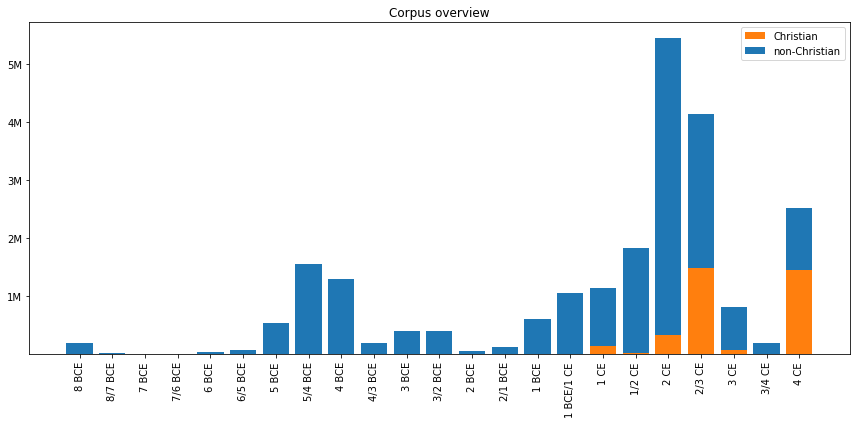

In [89]:
fig, ax = plt.subplots(figsize=(12, 6), tight_layout=True)
#subselections_df = subselections_df.iloc[::-1]
ax.bar(subselections_df["date_string"], subselections_df["wordcount_christian"], color="tab:orange", label="Christian")
ax.bar(subselections_df["date_string"], subselections_df["wordcount_pagan"], bottom=subselections_df["wordcount_christian"], label="non-Christian", color="tab:blue")


ax.set_yticks(range(1000000,6000000, 1000000))
ax.set_yticklabels(str(n) + "M" for n in range(1,6))
ax.set_xticklabels(subselections_df["date_string"], rotation=90)
ax.legend()
plt.title("Corpus overview")

In [78]:
sddk.write_file("SDAM_data/ECCE_public/corpus_overview.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/ECCE_public/coprus_overview.png"


In [90]:
def plot_ratios(corpus_df, label_col, plot_title):
  corpus_df = corpus_df[::-1]
  data = {}
  for n in range(len(corpus_df)):
    label = str(corpus_df.iloc[n][label_col]) + " (" + str(corpus_df.iloc[n]["doccount"]) + " docs; " + str(corpus_df.iloc[n]["wordcount"]) + " words)"
    counts = corpus_df.iloc[n][words].tolist()
    values = corpus_df.iloc[n][[word + "_weighted" for word in words]].tolist()
    values = [0 if math.isnan(x) else x for x in values]
    ratios = [val / corpus_df.iloc[n]["weighted_sum"] * 100 for val in  values] # if val > 0]
    ratios = [0 if math.isnan(x) else x for x in ratios]
    data[label] = (counts, ratios)

  labels = list(data.keys())
  counts = np.array([el[0] for el in list(data.values())])
  ratios = np.array([el[1] for el in list(data.values())])
  ratios_cum = ratios.cumsum(axis=1)

  category_colors = ["tab:blue", "tab:green", "tab:red"]

  terms = words


  fig, ax = plt.subplots(figsize=(12, len(corpus_df)/4 + 1), tight_layout=True)
  ax.invert_yaxis()
  ax.xaxis.set_visible(False)

  ax.set_xlim(0, np.sum(ratios, axis=1).max())
  ax.set_ylim(-0.5, len(corpus_df) - 0.5)

  for i, (term, color) in enumerate(zip(terms, category_colors)):
          widths = ratios[:, i]
          texts = counts[:, i]
          starts = ratios_cum[:, i] - widths
          ax.barh(labels, widths, left=starts,
                  label=term, color=color)
          xcenters = starts + widths / 2
          for y, (x, c) in enumerate(zip(xcenters, texts)):
              if int(c) > 0:
                ax.text(x, y, str(int(c)), ha='center', va='center', color='white')
              else:
                ax.text(x, y, "", ha='center', va='center', color='white')
  ax.legend(ncol=len(terms), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
  plt.title(plot_title)
  return fig

/home/kasev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


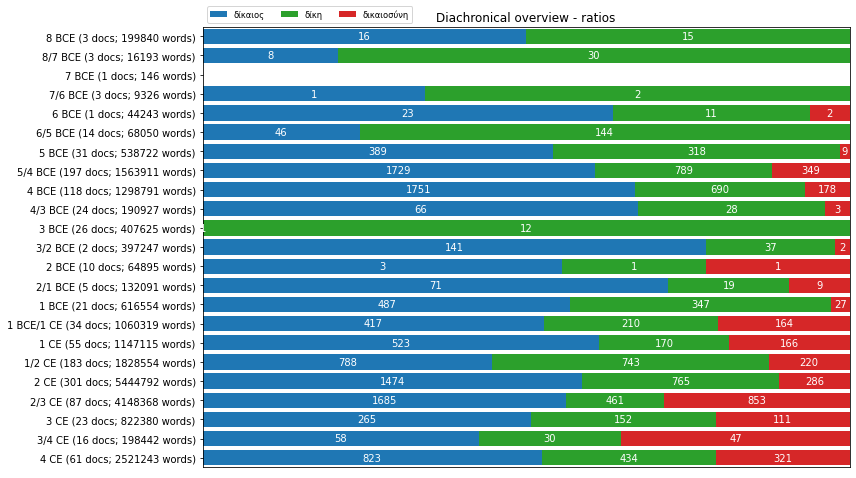

In [91]:
fig = plot_ratios(subselections_df, "date_string", "Diachronical overview - ratios")

In [92]:
sddk.write_file("SDAM_data/ECCE_public/ratios_diachronical.png", fig, conf)

A file with the same name ("ratios_diachronical.png") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/ECCE_public/ratios_diachronical.png"


#¬†Overview based on subcorpora

In [93]:
subcorpora_dict = {
    "Pagan (8th c. BCE - 4th c. CE)" : AGT[(AGT["provenience"]=="pagan") & (AGT["date_avr"] < 4)],
    "Pagan (1st - 4th c. CE)" : AGT[(AGT["date_avr"].between(0, 4)) & (AGT["provenience"]=="pagan")],
    "Septuagint" : AGT[AGT["author_id"]=="tlg0527"],
    "Philo of Alexandria" : AGT[AGT["author_id"]=="tlg0018"],
    "Titus Flavius Josephus" : AGT[AGT["author_id"]=="tlg0526"],
    "Paul of Tarsus" : AGT[AGT["author_id"]=="tlg0031paul"],
    "New Testament" : AGT[AGT["author_id"].str.startswith("tlg0031")],
    "Christian (1st - 4th c. CE)" : AGT[(AGT["date_avr"] < 4) & (AGT["provenience"]=="christian")]}

In [100]:
subselections = []
for key in subcorpora_dict.keys():
    subselection = subcorpora_dict[key]
    subselection_dict = {}
    wordcount = subselection["wordcount"].sum()
    doccount = len(subselection)
    subselection_dict.update({"label" : key, "wordcount" : wordcount, "doccount" : doccount})
    subselection_dict.update(count_words_in_df_column(subselection["lemmata"], words, wordcount))
    subselections.append(subselection_dict)


In [101]:
subselections_df = pd.DataFrame(subselections)
subselections_df

label  wordcount  doccount  Œ¥ŒØŒ∫Œ±ŒπŒøœÇ  \
0  Pagan (8th c. BCE - 4th c. CE)   13736632       765     6085   
1         Pagan (1st - 4th c. CE)    9448494       409     2260   
2                      Septuagint     974597        55      515   
3             Philo of Alexandria     755660        31      383   
4          Titus Flavius Josephus     475852         4      354   
5                  Paul of Tarsus      24083         7       14   
6                   New Testament     137846        27       82   
7     Christian (1st - 4th c. CE)    3521122       131     1952   

   Œ¥ŒØŒ∫Œ±ŒπŒøœÇ_weighted  Œ¥ŒØŒ∫Œ∑  Œ¥ŒØŒ∫Œ∑_weighted  Œ¥ŒπŒ∫Œ±ŒπŒøœÉœçŒΩŒ∑  Œ¥ŒπŒ∫Œ±ŒπŒøœÉœçŒΩŒ∑_weighted  \
0           0.00044  3467        0.00025        1154              0.00008   
1           0.00024  1533        0.00016         621              0.00007   
2           0.00053    51        0.00005         373              0.00038   
3           0.00051   171        0.00023         158              0.00021   
4           0.00074   157        0.00033          39              0.00008   
5           0.00058     0        0.00000          48              0.00199   
6           0.00059     3        0.00002          90              0.00065   
7           0.00055   549        0.00016        1097              0.00031   

   weighted_sum  
0       0.00077  
1       0.00047  
2       0.00096  
3       0.00095  
4       0.00115  
5       0.00257  
6       0.00126  
7       0.00102

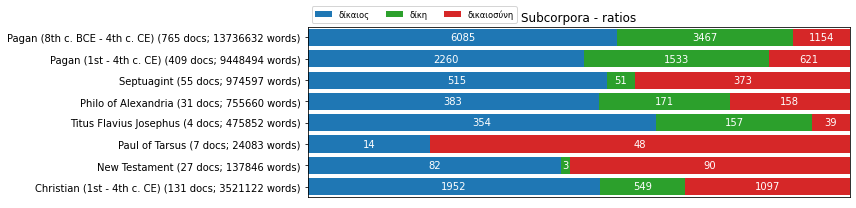

In [96]:
fig = plot_ratios(subselections_df, "label", "Subcorpora - ratios")

In [97]:
sddk.write_file("SDAM_data/ECCE_public/subcorpora_ratios.png", fig, conf)

A file with the same name ("subcorpora_ratios.png") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/ECCE_public/subcorpora_ratios.png"


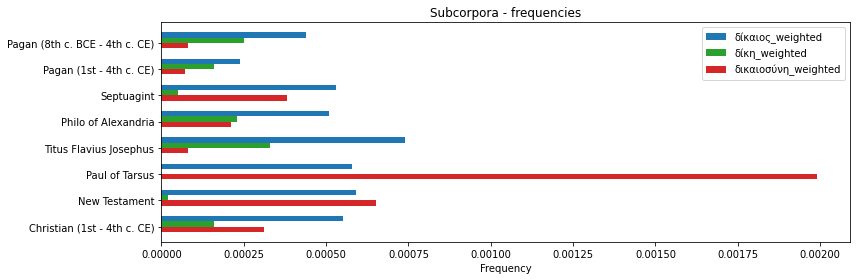

In [107]:
subselections_df = subselections_df.iloc[::-1]

fig, ax = plt.subplots(figsize=(12, 4), tight_layout=True)

y = np.arange(len(subselections_df))  # the label locations
width = 0.2  # the width of the bars

bar_location = 0
for keyterm, color in [("Œ¥ŒØŒ∫Œ±ŒπŒøœÇ_weighted", "tab:blue"), ("Œ¥ŒØŒ∫Œ∑_weighted", "tab:green"), ("Œ¥ŒπŒ∫Œ±ŒπŒøœÉœçŒΩŒ∑_weighted", "tab:red")]:
  #coloring = subselections_df[keyterm + "_weighted"] / subselections_df["weighted_sum"].max()
  ax.barh(y + 0.3 - bar_location, subselections_df[keyterm], width, color=color, label=keyterm)
  bar_location = bar_location + 0.2
#ax.barh(y, wordcounts, width * 4, color="none", edgecolor="black")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title("Subcorpora - frequencies")

ax.set_xlabel("Frequency")
#ax1.set_ylabel("documents")
ax.set_yticks(y)
ax.set_yticklabels(subselections_df["label"])

plt.legend()


In [108]:
sddk.write_file("SDAM_data/ECCE_public/subcorpora_overview.png", fig, conf)

A file with the same name ("subcorpora_overview.png") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/ECCE_public/subcorpora_overview.png"


#¬†PHI overview

In [109]:
#¬†read the PHI dataset from sciencedata.dk
#¬†(takes some time - the dataset has almost 400MB)
PHI = sddk.read_file("SDAM_data/PHI/PHI_dated_lemmatized_20201023.json", "df", conf)
# older version used during development: PHI = sddk.read_file("SDAM_data/PHI/PHI_enriched_raw.json", "df", conf)
#¬†print first 5 rows of the data
PHI.head(5)

URL   Book Text  \
0  https://epigraphy.packhum.org/text/1  IG I¬≥    1   
1  https://epigraphy.packhum.org/text/2  IG I¬≥    2   
2  https://epigraphy.packhum.org/text/3  IG I¬≥    3   
3  https://epigraphy.packhum.org/text/4  IG I¬≥    4   
4  https://epigraphy.packhum.org/text/5  IG I¬≥    5   

                                 hdr1  hdr2  \
0  Regions\n\nAttica (IG I-III)Attica  None   
1  Regions\n\nAttica (IG I-III)Attica  None   
2  Regions\n\nAttica (IG I-III)Attica  None   
3  Regions\n\nAttica (IG I-III)Attica  None   
4  Regions\n\nAttica (IG I-III)Attica  None   

                                           tildeinfo  note  lines  \
0  Att. ‚Äî Ath.: Akr. ‚Äî stoich. 35 ‚Äî c. 510-500 a....  None   12.0   
1                     Att. ‚Äî non-stoich. ‚Äî c. 500 a.  None   14.0   
2                     Att. ‚Äî stoich. 21 ‚Äî 490-480 a.  None   13.0   
3                       Att. ‚Äî stoich. 38 ‚Äî 485/4 a.  None   58.0   
4        Att. ‚Äî c. 500 a.\n\nSee also:\nI.Eleusis 13  None    6.0   

                                            metadata  \
0                 \n1\n\n\n\n\n5\n\n\n\n\n\n10\n\n\n   
1             \n1\n\n\n\n\n5\n\n\n\n\n\n10\n\n\n\n\n   
2               \n1\n\n\n\n\n5\n\n\n\n\n\n10\n\n\n\n   
3  \nface A.1\n\n\n\n\n5\n\n\n\n\n\n10\n\n\n\n\n\...   
4                                \n1\n\n\n\n \n5\n\n   

                                                data  ...        raw_date  \
0  ·ºîŒ¥ŒøœáœÉŒµŒΩ œÑŒøÕÇŒπ Œ¥Œ≠ŒºŒøŒπ¬∑ œÑÃ£[·Ω∏œÇ ·ºê Œ£]Œ±ŒªŒ±ŒºÃ£[·øñŒΩŒπ Œ∫ŒªŒµœÅœåœá...  ...  c. 510-500 a.    
1  [‚Ä§‚Ä§8-9‚Ä§‚Ä§‚Ä§]ŒΩÃ£ Œ≤ŒøŒª ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî\n[‚Ä§6-7‚Ä§‚Ä§]...  ...       c. 500 a.   
2  [‚Ä§]Œ±œÅ[‚Ä§‚Ä§‚Ä§‚Ä§]Œπ ‚ÑéŒµœÅŒ±Œ∫ŒªŒµŒπŒø[‚Ä§‚Ä§5‚Ä§‚Ä§]\n[‚Ä§]Œ±œÅÃ£Œø#‚Å∑[‚Ä§] œÑŒπ...  ...      490-480 a.   
3  [‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§38‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§]\n[‚Ä§‚Ä§‚Ä§...  ...        485/4 a.   
4  [·ºîŒ¥ŒøœáœÉŒµ]ŒΩ [‚ãÆ œÑŒµÕÇŒπ Œ≤ŒøŒªŒµÕÇŒπ] ‚ãÆ Œ∫Œ±·Ω∂ [œÑ]ŒøÕÇŒπ Œ¥Œ≠ŒºŒøŒπ ‚ãÆ...  ...       c. 500 a.   

                                         dating_dict not_before not_after  \
0  {'or': None, 'not_before': -511, 'not_after': ...     -511.0    -499.0   
1  {'or': None, 'not_before': -505, 'not_after': ...     -505.0    -495.0   
2  {'or': None, 'not_before': -490, 'not_after': ...     -490.0    -480.0   
3  {'or': None, 'not_before': -485, 'not_after': ...     -485.0    -484.0   
4  {'or': None, 'not_before': -505, 'not_after': ...     -505.0    -495.0   

     or           date_tags certainty  link  \
0  None  [range, phase, ca]      None  None   
1  None  [exact, phase, ca]      None  None   
2  None             [range]      None  None   
3  None             [range]      None  None   
4  None  [exact, phase, ca]      None  None   

                                             lemmata  \
0  [·ºîŒ¥ŒøœáœÉŒµŒΩ, œÑŒø·øñŒøœÇ, Œ¥Œ≠ŒºŒøŒπ, œÑœåœÇ, Œ£Œ±ŒªŒ±ŒºŒØœÇ, Œ∫ŒªŒµœÅœåœáŒøœÇ...   
1  [Œ≤ŒøŒª, ‚ÑéŒµŒ∫ŒøŒΩ, Œ∏ŒµœåœÇ, Œ≥ŒΩŒøœÉŒ∏ŒµŒπ, ·ºÄœÑŒµœáŒΩŒøœÇ, ŒºŒµŒ¥Œ≠, ‚ÑéŒ±Œº...   
2  [·ºÄœÅŒØœÇ, ‚ÑéŒµœÅŒ±Œ∫ŒªŒµŒπŒø, ·ºÄœÅœåœâ, œÑŒØŒ∏Œ∑ŒºŒπ, œÑœåœÇ, ·ºÄŒ∏ŒªŒøŒ∏Œ≠œÑŒ∑œÇ...   
3  [·ºÑŒΩŒ±Œæ, œÜœÅŒøœÅŒ¨ŒΩ, œÄŒµŒΩœÑŒ≠Œ∫ŒøŒΩœÑŒ±, Œ¥œÅŒ±œáŒºŒÆ, ·ºµŒ∑ŒºŒπ, œÄœÅ·æ∂œáœÉ...   
4  [·ºîŒ¥ŒøœáœÉŒµŒΩ, œÑŒµŒπ, Œ≤ŒøŒªŒµŒπ, œÑŒø·øñŒøœÇ, Œ¥Œ≠ŒºŒøŒπ, ‚ÑéœåœÑŒµ, œÄŒ±œÅŒ±...   

                                   string_normalized  
0  ·ºîŒ¥ŒøœáœÉŒµŒΩ œÑŒøÕÇŒπ Œ¥Œ≠ŒºŒøŒπ œÑ·Ω∏œÇ ·ºê Œ£Œ±ŒªŒ±Œº·øñŒΩŒπ Œ∫ŒªŒµœÅœåœáŒøœÇ Œø·º∞Œ∫...  
1  ŒΩ Œ≤ŒøŒª Œ± ‚ÑéŒµŒ∫ŒøŒΩ œÉŒπŒøŒΩ Œ≥ŒΩŒøœÉŒ∏ŒµÕÇŒπ Œ¥·Ω≤ ŒΩ ·ºÄœÑŒµœáŒΩŒøœÇ Œº·Ω≤ œÄ ...  
2  Œ±œÅŒπ ‚ÑéŒµœÅŒ±Œ∫ŒªŒµŒπŒø Œ±œÅŒø œÑŒπŒ∏Œ≠ŒΩŒ±Œπ œÑ·Ω∏œÇ ·ºÄŒ∏ŒªŒøŒ∏Œ≠œÑŒ±œÇ œÑœÅŒπŒ¨Œ∫Œø...  
3  ·ºê·Ω∞ŒΩ Œ¥Œ≠ œÑŒπœÇ Œ±ŒΩ ·ºí œÜœÅŒøœÅ·Ω∞ŒΩ Œº·Ω≤ œÄŒµŒΩœÑŒ≠Œ∫ŒøŒΩœÑŒ± Œ¥œÅŒ±œáŒº·Ω∞œÇ œÑ...  
4  ·ºîŒ¥ŒøœáœÉŒµŒΩ œÑŒµÕÇŒπ Œ≤ŒøŒªŒµÕÇŒπ Œ∫Œ±·Ω∂ œÑŒøÕÇŒπ Œ¥Œ≠ŒºŒøŒπ ‚ÑéœåœÑŒµ Œ†Œ±œÅŒ±ŒπŒ≤...  

[5 rows x 27 columns]

In [149]:
PHI["wordcount"] = PHI["string_normalized"].apply(lambda string: len(string.split()))

In [111]:
#¬†read and execute our script for modelling dates
script_url = "https://raw.githubusercontent.com/sdam-au/modelling_temporal_uncertainty/master/scripts/modelling_distributions.py"
# execute the script
exec(requests.get(script_url).content)

In [112]:
%%time
# generate a list of 1000 random dates for each inscription in the dataset
# takes approx. 90 seconds in Google colab
PHI["random_dates"] = PHI.apply(lambda row: model_date(row["not_before"], row["not_after"], size=1000,), axis=1)

CPU times: user 59.3 s, sys: 1.01 s, total: 1min
Wall time: 1min


In [ ]:
words = ["Œ¥ŒØŒ∫Œ±ŒπŒøœÇ", "Œ¥ŒØŒ∫Œ∑", "Œ¥ŒπŒ∫Œ±ŒπŒøœÉœçŒΩŒ∑"]
def count_words(list_of_words):
    
    



In [113]:
words = ["Œ¥ŒØŒ∫Œ±ŒπŒøœÇ", "Œ¥ŒØŒ∫Œ∑", "Œ¥ŒπŒ∫Œ±ŒπŒøœÉœçŒΩŒ∑"]
for word in words:
    PHI[word] = PHI["lemmata"].apply(lambda x: x.count(word))

In [116]:
for word in words:
    print(word, PHI[word].sum())

Œ¥ŒØŒ∫Œ±ŒπŒøœÇ 2017
Œ¥ŒØŒ∫Œ∑ 1854
Œ¥ŒπŒ∫Œ±ŒπŒøœÉœçŒΩŒ∑ 645


In [126]:
PHI_complete_simulations = timeblocks_from_randoms(PHI, "random_dates", [-800, 400, 50])
# look at the first one
PHI_complete_simulations[0]

[((-800, -751), 15),
 ((-750, -701), 57),
 ((-700, -651), 180),
 ((-650, -601), 253),
 ((-600, -551), 910),
 ((-550, -501), 2018),
 ((-500, -451), 3878),
 ((-450, -401), 4197),
 ((-400, -351), 6191),
 ((-350, -301), 8962),
 ((-300, -251), 8070),
 ((-250, -201), 8970),
 ((-200, -151), 8991),
 ((-150, -101), 7155),
 ((-100, -51), 4848),
 ((-50, -1), 5083),
 ((1, 50), 6148),
 ((51, 100), 6009),
 ((101, 150), 10240),
 ((151, 200), 9960),
 ((201, 250), 8871),
 ((251, 300), 5912),
 ((301, 350), 3136),
 ((351, 400), 2873)]

In [127]:
sub_df = PHI[PHI["Œ¥ŒπŒ∫Œ±ŒπŒøœÉœçŒΩŒ∑"]>0]
sub_df_sim = timeblocks_from_randoms(sub_df,  "random_dates", [-800, 400, 50])
sub_df_sim[0]
#¬†for timeblock in PHI_complete_simulations[0].keys():

[((-800, -751), 0),
 ((-750, -701), 0),
 ((-700, -651), 0),
 ((-650, -601), 0),
 ((-600, -551), 0),
 ((-550, -501), 0),
 ((-500, -451), 1),
 ((-450, -401), 5),
 ((-400, -351), 33),
 ((-350, -301), 130),
 ((-300, -251), 51),
 ((-250, -201), 51),
 ((-200, -151), 24),
 ((-150, -101), 38),
 ((-100, -51), 19),
 ((-50, -1), 16),
 ((1, 50), 10),
 ((51, 100), 6),
 ((101, 150), 12),
 ((151, 200), 8),
 ((201, 250), 10),
 ((251, 300), 4),
 ((301, 350), 4),
 ((351, 400), 1)]

In [146]:
def get_date_from_randoms(value, n):
    try:
        return value[n]
    except:
        return None

dating_variant = PHI["random_dates"].apply(lambda x: get_date_from_randoms(x, 0))
mask = dating_variant.between(-400, -301)
timeblock_df_variant = PHI[mask]


In [147]:
word = "Œ¥ŒπŒ∫Œ±ŒπŒøœÉœçŒΩŒ∑"
for timeblock in PHI_complete_simulations[0].keys(): #¬†borrow timeblock keys
    for n in range(1000):
        mask = PHI["random_dates"].apply(lambda x: get_date_from_randoms(x, n)).between(timeblock[0], timeblock[1])
        PHI_variant_subset = PHI[mask]
        wordcount = PHI_variant_subset["wordcount"].sum()
        word_count = PHI_variant_subset["lemmata"].apply(lambda x: x.count(word))
        word_freq = wordcount / word_count
        
        

URL   Book Text  \
142  https://epigraphy.packhum.org/text/143  IG I¬≥  140   
198  https://epigraphy.packhum.org/text/199  IG I¬≥  192   
235  https://epigraphy.packhum.org/text/236  IG I¬≥  228   
236  https://epigraphy.packhum.org/text/237  IG I¬≥  229   
400  https://epigraphy.packhum.org/text/401  IG I¬≥  389   

                                   hdr1  hdr2  \
142  Regions\n\nAttica (IG I-III)Attica  None   
198  Regions\n\nAttica (IG I-III)Attica  None   
235  Regions\n\nAttica (IG I-III)Attica  None   
236  Regions\n\nAttica (IG I-III)Attica  None   
400  Regions\n\nAttica (IG I-III)Attica  None   

                                             tildeinfo  note  lines  \
142                     Att. ‚Äî stoich. ‚Äî c. 450-400 a.  None   13.0   
198                          Att. ‚Äî stoich. ‚Äî s. IV a.  None    4.0   
235                       Att. ‚Äî stoich. 27 ‚Äî 385/4 a.  None   32.0   
236                       Att. ‚Äî stoich. 28 ‚Äî s. IV a.  None    8.0   
400  Att. ‚Äî stoich. ‚Äî p. post 408/7 a.\n\nSee also:...  None   33.0   

                                              metadata  \
142               \n\n1\n\n\n\n\n5\n\n\n\n\n\n10\n\n\n   
198                                        \n1\n\n\n\n   
235  \nfrg. a.1\n\n\n\n3\n\n\n5\n\n\nfrg. b.6\n\n\n...   
236                             \n1\n\n\n\n\n5\n\n\n\n   
400  \nface A front\n\n1\n\n\n\n\n5\n\n\n\n\n\n10\n...   

                                                  data  ...    or  \
142  ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî\n[‚Ä§‚Ä§‚Ä§7‚Ä§‚Ä§‚Ä§]œÉŒ± ‚Äî ‚Äî...  ...  None   
198  ·ºîŒ¥ŒøœáœÉ[ŒµŒΩ œÑŒµÕÇŒπ Œ≤ŒøŒªŒµÕÇŒπ Œ∫Œ±·Ω∂ œÑŒøÕÇŒπ Œ¥Œ≠ŒºŒøŒπ¬∑ ‚Äî ‚Äî ·ºêœÄœÅœÖœÑ...  ...  None   
235  ·ºêœÄ·Ω∂ ŒîŒµŒæ[ŒπŒ∏Œ≠Œø ·ºÑœÅœáŒøŒΩœÑŒøœÇ].\nŒ¶ŒπŒªœåŒæŒµŒΩ[ŒøœÇ ·ºêŒ≥œÅŒ±ŒºŒºŒ¨œÑŒµœÖ...  ...  None   
236  [‚Ä§‚Ä§‚Ä§]œÄ[‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§20‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§‚Ä§ ·ºêœÄŒµŒπ]-\n[Œ¥]·Ω¥ Œ¥·Ω≤ Œ∫Œ±...  ...  None   
400  ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî ‚Äî\n[‚Äî ‚Äî‚ÄÉ‚ÄÉ‚ÄÉ‚ÄÉ‚ÄÉ‚ÄÉ‚ÄÉ‚ÄÉ‚ÄÉ‚ÄÉ‚ÄÉ‚ÄÉ‚ÄÉ...  ...  None   

              date_tags certainty  link  \
142  [range, phase, ca]      None  None   
198       [range, cent]      None  None   
235             [range]      None  None   
236       [range, cent]      None  None   
400       [range, post]      None  None   

                                               lemmata  \
142  [œÉŒÆœÇ, ·ΩÖŒªŒøŒæ, Œø·º∂ŒπœÇ, œÉœÑŒ≠ŒªŒµŒπ, ŒªŒπŒ∏ŒØŒΩŒµŒπ, ·ºïŒΩŒøœÇ, Œ≥œÅŒ±ŒºŒº...   
198  [·ºîŒ¥ŒøœáœÉŒµŒΩ, œÑŒµŒπ, Œ≤ŒøŒªŒµŒπ, œÑŒø·øñŒøœÇ, Œ¥Œ≠ŒºŒøŒπ, œÄœÅœÖœÑŒ±ŒΩŒµœçœâ,...   
235  [Œ¥ŒµŒæŒπŒ∏Œ≠Œø, ·ºÑœÅœáœâŒΩ, œÜŒπŒªœåŒæŒµŒΩŒøœÇ, Œ≥œÅŒ±ŒºŒºŒ±œÑŒµœçœâ, Œ¥ŒøŒ∫Œ≠œâ,...   
236  [·ºêœÄŒµŒπŒ¥Œ∑, Œ∫Œ±Œ∏Œ∑ŒπœÅŒ≠Œ∏Œ∑, œÉœÑŒÆŒªŒ∑, œÄœÅœåœÑŒµœÅŒøœÇ, ·ºÄŒΩŒ±Œ≥œÅŒ¨œÜœâ,...   
400  [Œ∫œçŒªŒπœáœÇ, œáœÅœÖœÉœåœÇ, œÉœÑŒ±Œ∏ŒºœåœÇ, Œ∑êÖÉ, Œ∫œçŒªŒπœáœÇ, ·ºÄœÅŒ≥œçœÅŒµŒøœÇ...   

                                     string_normalized  \
142  œÉŒ± ŒüŒõ ŒüŒô ·ºêŒΩ œÉœÑŒ≠ŒªŒµŒπ ŒªŒπŒ∏ŒØŒΩŒµŒπ ŒµŒΩ Œ∫Œ±·Ω∂ œÑ·Ω∏ œá œÄŒ±œÅŒ±Œ¥ŒµŒ¥...   
198  ·ºîŒ¥ŒøœáœÉŒµŒΩ œÑŒµÕÇŒπ Œ≤ŒøŒªŒµÕÇŒπ Œ∫Œ±·Ω∂ œÑŒøÕÇŒπ Œ¥Œ≠ŒºŒøŒπ ·ºêœÄœÅœÖœÑŒ¨ŒΩŒµœÖŒµ ...   
235  ·ºêœÄ·Ω∂ ŒîŒµŒæŒπŒ∏Œ≠Œø ·ºÑœÅœáŒøŒΩœÑŒøœÇ Œ¶ŒπŒªœåŒæŒµŒΩŒøœÇ ·ºêŒ≥œÅŒ±ŒºŒºŒ¨œÑŒµœÖŒµ ·ºîŒ¥Œø...   
236  œÄ ·ºêœÄŒµŒπŒ¥·Ω¥ Œ¥·Ω≤ Œ∫Œ±Œ∏Œ∑ŒπœÅŒ≠Œ∏Œ∑ ·ºêœÄ·Ω∂ œÑ·ø∂ŒΩ œÑœÅŒπŒ¨Œ∫ŒøŒΩœÑŒ± Œ±·ΩêœÑŒø·øñœÇ...   
400  Œ∫œçŒªŒπœáœÇ œáœÅœÖœÉŒµÕÇ œÉœÑŒ±Œ∏ŒºœåŒΩ ŒóêÖÉ Œ∫œçŒªŒπœáœÇ ·ºÄœÅŒ≥œÖœÅ·æ∂ œÉœÑŒ±Œ∏ŒºœåŒΩ...   

                                          random_dates Œ¥ŒØŒ∫Œ±ŒπŒøœÇ Œ¥ŒØŒ∫Œ∑  \
142  [-397, -432, -403, -400, -423, -399, -410, -45...       0    0   
198  [-323, -369, -338, -387, -390, -308, -327, -31...       0    0   
235  [-385, -385, -384, -385, -384, -385, -384, -38...       0    0   
236  [-341, -302, -305, -362, -380, -336, -374, -30...       0    0   
400  [-384, -391, -383, -374, -397, -390, -387, -38...       0    0   

     Œ¥ŒπŒ∫Œ±ŒπŒøœÉœçŒΩŒ∑  
142           0  
198           0  
235           0  
236           0  
400           0  

[5 rows x 31

In [137]:
PHI["random_dates"].apply(ambda x: try: x[0] e % len(x) > 0) # .between(-400, -301)

0         [-507, -500, -511, -499, -506, -502, -502, -50...
1         [-503, -495, -501, -495, -503, -502, -500, -50...
2         [-490, -485, -484, -480, -483, -482, -482, -48...
3         [-484, -484, -485, -485, -484, -485, -484, -48...
4         [-496, -505, -503, -503, -498, -496, -505, -50...
                                ...                        
216697                                                 None
216698                                                 None
216699    [521, 518, 597, 548, 549, 532, 585, 534, 543, ...
216700                                                 None
216701                                                 None
Name: random_dates, Length: 216702, dtype: object

In [ ]:
for n in range(1000):
    for timeblock in PHI_complete_simulations[0].keys():
        PHI.

In [ ]:
def get_tf_from_sims(sub_sim_variant, main_sim_variant):
    for timeblock in main_sim_variant.keys():
        sim_tf = sub_sims[timeblock] / main_sims[timeblock]

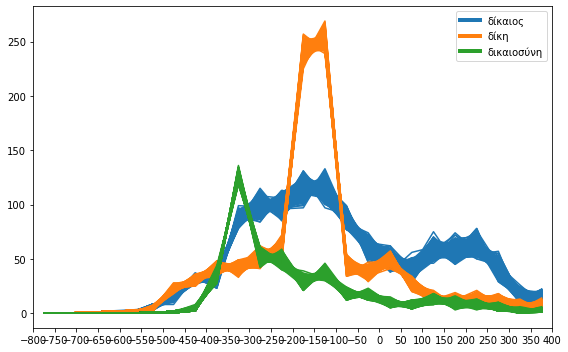

In [124]:
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
import matplotlib.colors as mcolors
tab_colors_list = list(mcolors.TABLEAU_COLORS.keys())


import matplotlib.lines as mlines


fig, ax = plt.subplots(1, 1, figsize=(8, 5), tight_layout=True)

markers = []

for word, color in zip(words, tab_colors_list):
    sub_df = PHI[PHI[word]>0]
    sub_df_sim = timeblocks_from_randoms(sub_df,  "random_dates", [-800, 400, 50])
    
    layer = plot_timeblocks_data(sub_df_sim, ax=ax, color=color)
    markers.append(mlines.Line2D([], [], linewidth=4, label=word, color=color))

 
ax.set_xlim(-800, 400)
ax.set_xticks(range(-800, 450, 50))

ax.legend(handles=markers)